In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df.shape

(1000, 8)

In [4]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [7]:
for i in categorical_cols:
    print(df[i].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


<Axes: xlabel='count', ylabel='gender'>

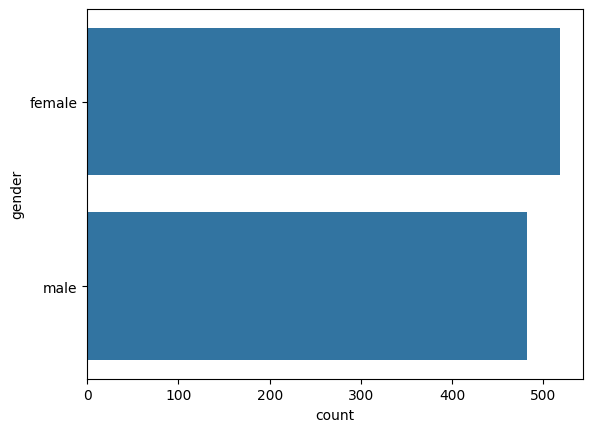

In [8]:
sns.countplot(df['gender'])

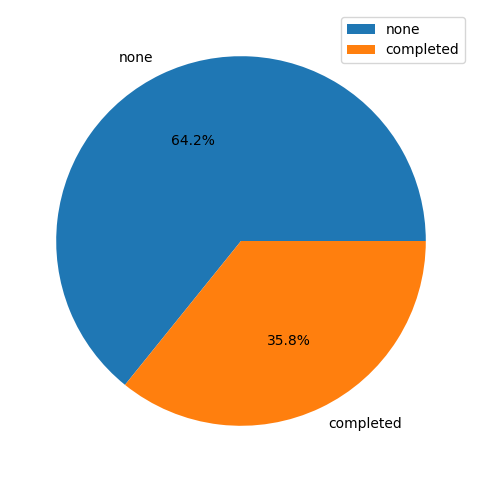

In [9]:
count_test = df['test preparation course'].value_counts()
labels = df['test preparation course'].value_counts().index
plt.figure(figsize= (6,6))
plt.pie(count_test,labels=labels,autopct='%1.1f%%')
plt.legend(labels)
plt.show()

In [10]:
df['average_score']=(df['math score']+df['reading score']+df['writing score'])/3
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


<Axes: xlabel='average_score', ylabel='math score'>

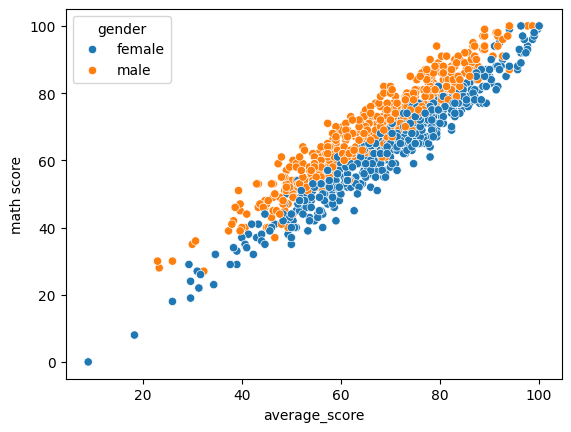

In [11]:
sns.scatterplot(x=df['average_score'],y=df['math score'],hue=df['gender'])

<Axes: xlabel='average_score', ylabel='reading score'>

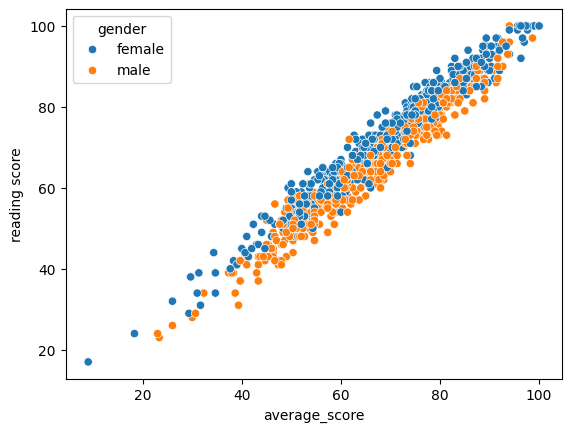

In [12]:
sns.scatterplot(x=df['average_score'],y=df['reading score'],hue=df['gender'])

In [13]:
gender = {
    'male':1,
    'female':0
}
race = {
    'group A':0,
    'group B':1,
    'group C':2,
    'group D':3,
    'group E':4
}
df['gender']=df['gender'].map(gender)
df['race/ethnicity']=df['race/ethnicity'].map(race)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,0,1,bachelor's degree,standard,none,72,72,74,72.666667
1,0,2,some college,standard,completed,69,90,88,82.333333
2,0,1,master's degree,standard,none,90,95,93,92.666667
3,1,0,associate's degree,free/reduced,none,47,57,44,49.333333
4,1,2,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,0,4,master's degree,standard,completed,88,99,95,94.000000
996,1,2,high school,free/reduced,none,62,55,55,57.333333
997,0,2,high school,free/reduced,completed,59,71,65,65.000000
998,0,3,some college,standard,completed,68,78,77,74.333333


In [14]:
level = {
    "bachelor's degree":0,
    'some college':1,
    "master's degree":2,
    "associate's degree":3,
    "high school":4,
    "some high school":5
}
df['parental level of education']=df['parental level of education'].map(level)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,0,1,0,standard,none,72,72,74,72.666667
1,0,2,1,standard,completed,69,90,88,82.333333
2,0,1,2,standard,none,90,95,93,92.666667
3,1,0,3,free/reduced,none,47,57,44,49.333333
4,1,2,1,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,0,4,2,standard,completed,88,99,95,94.000000
996,1,2,4,free/reduced,none,62,55,55,57.333333
997,0,2,4,free/reduced,completed,59,71,65,65.000000
998,0,3,1,standard,completed,68,78,77,74.333333


In [15]:
df = pd.get_dummies(df,drop_first=True)
df

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,average_score,lunch_standard,test preparation course_none
0,0,1,0,72,72,74,72.666667,True,True
1,0,2,1,69,90,88,82.333333,True,False
2,0,1,2,90,95,93,92.666667,True,True
3,1,0,3,47,57,44,49.333333,False,True
4,1,2,1,76,78,75,76.333333,True,True
...,...,...,...,...,...,...,...,...,...
995,0,4,2,88,99,95,94.000000,True,False
996,1,2,4,62,55,55,57.333333,False,True
997,0,2,4,59,71,65,65.000000,False,False
998,0,3,1,68,78,77,74.333333,True,False


In [16]:
x = df.drop(columns='average_score').values
x

array([[0, 1, 0, ..., 74, True, True],
       [0, 2, 1, ..., 88, True, False],
       [0, 1, 2, ..., 93, True, True],
       ...,
       [0, 2, 4, ..., 65, False, False],
       [0, 3, 1, ..., 77, True, False],
       [0, 3, 1, ..., 86, False, True]], dtype=object)

In [17]:
y = df['average_score'].values
y

array([ 72.66666667,  82.33333333,  92.66666667,  49.33333333,
        76.33333333,  77.33333333,  91.66666667,  40.66666667,
        65.        ,  49.33333333,  54.66666667,  45.        ,
        73.        ,  73.33333333,  53.66666667,  74.        ,
        87.66666667,  26.        ,  44.66666667,  57.66666667,
        66.        ,  70.        ,  50.33333333,  71.66666667,
        75.        ,  73.        ,  59.33333333,  70.33333333,
        68.33333333,  69.        ,  72.33333333,  63.        ,
        64.33333333,  40.        ,  88.66666667,  80.33333333,
        79.33333333,  57.66666667,  84.33333333,  56.66666667,
        56.66666667,  66.33333333,  58.66666667,  63.33333333,
        53.33333333,  58.66666667,  60.66666667,  71.        ,
        69.        ,  82.66666667,  52.        ,  71.33333333,
        46.33333333,  80.33333333,  80.66666667,  39.        ,
        84.33333333,  52.        ,  58.33333333,   9.        ,
        75.        ,  37.33333333,  59.33333333,  73.33

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
model=RandomForestRegressor()

In [22]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [23]:
predictions=model.predict(x_test)
predictions

array([69.06333333, 77.27333333, 45.06      , 68.27666667, 74.07      ,
       72.91      , 69.96666667, 43.83      , 86.93666667, 38.12333333,
       52.04666667, 64.63666667, 82.46666667, 80.54      , 53.61666667,
       39.48333333, 53.07      , 86.50666667, 53.        , 79.60666667,
       62.88333333, 55.84666667, 76.68666667, 60.76333333, 47.86333333,
       64.18333333, 58.58666667, 48.63333333, 63.03666667, 82.21      ,
       79.47666667, 89.21333333, 88.93666667, 56.35666667, 55.01      ,
       83.96666667, 96.74333333, 59.01666667, 71.44      , 71.83      ,
       68.52666667, 56.68      , 70.44333333, 71.55333333, 78.69      ,
       58.35      , 85.25      , 61.76      , 84.06      , 58.33333333,
       38.37333333, 62.77      , 49.14333333, 57.00333333, 39.88333333,
       70.45      , 52.26666667, 64.53333333, 77.87      , 60.93      ,
       67.43333333, 77.42666667, 50.5       , 71.40666667, 65.64666667,
       64.70666667, 71.9       , 51.50333333, 66.93333333, 55.19

In [24]:
from sklearn.metrics import r2_score

In [25]:
print(r2_score(predictions,y_test))

0.9971390624307606


In [27]:
import pickle
pickle.dump(model,open('student.pkl','wb'))